In [59]:
import pandas as pd
data_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(data_url)#.fillna(0).set_index("date")

In [116]:
dff = df.fillna(0).set_index("date")
dff.index = pd.to_datetime(dff.index) 
dg = dff[["iso_code","new_cases", "total_cases"]]
dh = dg[dg["iso_code"].isin(("AUT","USA","ITA"))]

def rhu(n, decimals=0):
    import math
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

ld_dates = ["2020-03-16","2020-03-25"]
dq = dh[dh.index.isin(ld_dates)]
dq[dq["iso_code"].isin(["AUT"])]

dates_in_pd = [x for x in dq.index.tolist() if x in pd.to_datetime(ld_dates)]
print(f'ld_dates: {ld_dates}',f'dates_in_pd: {dates_in_pd}', dq.index.tolist())

#dh[dh["iso_code"].isin(("AUT","USA")).index == "2020-02-25"]

ld_dates: ['2020-03-16', '2020-03-25'] dates_in_pd: [Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-25 00:00:00')] [Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-25 00:00:00'), Timestamp('2020-03-16 00:00:00'), Timestamp('2020-03-25 00:00:00')]


Miscellanea below

N: 8900000 minAUT: 2.0 maxAUT: 15774.0 minst/maxst: 0.00012679092177000128 {0.00012679092177000128} maxst/N: 0.0017723595505617978 ld_totcases: date
2020-03-16     1018.0
2020-04-14    14226.0
Name: total_cases, dtype: float64
N: 60000000.0 minITA: 453.0 maxITA: 217185.0 minst/maxst: 0.0020857794046550177 {0.0020857794046550177} maxst/N: 0.00361975 ld_totcases: date
2020-03-11     12462.0
2020-05-04    211938.0
Name: total_cases, dtype: float64
N: 332000000 minUSA: 16.0 maxUSA: 1295396.0 minst/maxst: 1.2351435391185398e-05 {1.2351435391185398e-05} maxst/N: 0.0039017951807228915 ld_totcases: date
2020-03-19     13663.0
2020-04-04    321379.0
Name: total_cases, dtype: float64
N: 8900000 minAUT: 2.0 maxAUT: 15774.0 minst/maxst: 0.00012679092177000128 {0.00012679092177000128} maxst/N: 0.0017723595505617978 ld_totcases: date
2020-03-16     1018.0
2020-04-14    14226.0
Name: total_cases, dtype: float64
N: 60000000.0 minITA: 453.0 maxITA: 217185.0 minst/maxst: 0.0020857794046550177 {0.0020857

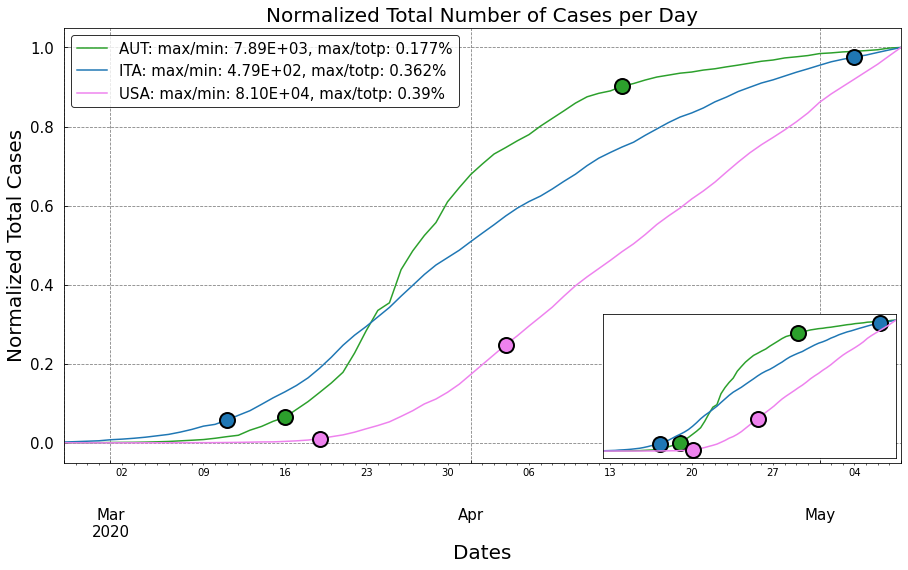

In [219]:
from mpl_toolkits.axes_grid.inset_locator import inset_axes
states = ["AUT","ITA","USA"]; N_states = [int(8.9*1e6), 6*1e7, int(3.32*1e8)]; 
ld_dates = [["2020-03-16","2020-04-14"], ["2020-03-11","2020-05-04"], ["2020-03-19","2020-04-04"]]
colors = ["tab:green", "tab:blue", "violet"]
def pdstates(state, ax, N, ld_date, color):
    ld_date = pd.to_datetime(ld_date)
    df = dh[dh["iso_code"]==state]
    start_date = "2020-02-25"; end_date = "2020-05-08" #2020-03-10 to find 1 --> 1000; 2020-03-25 linearity
    mask = (df.index > start_date) & (df.index <= end_date) 
    df = df.loc[mask]
    #dfstat["MA_dni_"+state] = dfstat["new_cases"].rolling(window = 7).mean()
    #dfstat["MA_dni_"+state].plot(ax = axs, label = state)
    ld_totcases = df[df.index.isin(ld_date)]["total_cases"]
    maxst = df.iloc[:,-2:].max()["total_cases"]
    minst = df["total_cases"][0]
    #https://sdw.ecb.europa.eu/quickview.do?SERIES_KEY=139.AME.A.AUT.1.0.0.0.ZUTN&periodSortOrder=ASC
    df = df.iloc[:,-2:].apply(lambda x: x/ x.max(), axis=0)
    print(f'N: {N}',f'min{state}: {minst}', f'max{state}: {maxst}', f'minst/maxst: {minst/maxst}',{minst/maxst}, f'maxst/N: {maxst/N}',f'ld_totcases: {ld_totcases}',)
    df["total_cases"].plot(ax = ax, label = f"{state}: max/min: {rhu(maxst/minst,3):.2E}, max/totp: {rhu(maxst/N*100,3)}%", color = color, )

    ld_date = [x for x in df.index.tolist() if x in pd.to_datetime(ld_date)]
    ld_totcases = df[df.index.isin(ld_date)]["total_cases"]
    ax.plot(ld_date, ld_totcases, marker = "o", ms = 15, mec = "k", mew = 2, color = color, lw = 0)
    return start_date



import matplotlib.pylab as plt
fig, axs = plt.subplots(figsize=(15, 8))
for state, n, ld_date, color in zip(states, N_states, ld_dates, colors):
    start_date = pdstates(state, ax = axs, N = n, ld_date = ld_date, color = color)
inset_axes = inset_axes(axs, 
            width="35%", # width = 30% of parent_bbox
            height=2, # height : 1 inch
            loc="lower right")

for state, n, ld_date, color in zip(states, N_states, ld_dates, colors):
    start_date = pdstates(state, ax = inset_axes, N = n, ld_date = ld_date, color = color)
    

axs.grid(color = "grey", ls = "--")
axs.set_xlabel("Dates", fontsize = 20); axs.set_ylabel("Normalized Total Cases", fontsize = 20); 
axs.set_title("Normalized Total Number of Cases per Day", fontsize = 20)
axs.tick_params(axis = "both", labelsize = 15, direction="in", pad=10)

inset_axes.set_yticks([])
inset_axes.set_xticks([], minor = True)
inset_axes.set_xticks([])
inset_axes.set_xlabel('')
inset_axes.set_xticklabels([], minor = True)

axs.legend(prop = {"size":15}, edgecolor = "k")
path_string = "/home/hal21/MEGAsync/Tour_Physics2.0/Thesis/NetSciThesis/Project/ComplexSpread/LateX/images/Introduction"
plt.savefig(f"{path_string}/COVID-RealStates_{start_date}.png", format="png", dpi=200)
